YOLOv8 - Treinamento customizado

#### Montagem do google colab

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Preparação do dataset

A estrutura necessária é a seguinte:

- /dataset
  - /train
  - /val

In [10]:
!mkdir dataset/ # Criando a pasta

In [13]:
obj_path = '/content/drive/MyDrive/recursos/obj.zip'

True

#### Copiando os dados de treino do google drive para o colab

In [21]:
cp /content/drive/MyDrive/recursos/obj.zip /content/obj.zip

Descompactação dos dados

In [23]:
!unzip obj.zip -d dataset/

Archive:  obj.zip
   creating: dataset/obj/
  inflating: dataset/obj/23d3389d17e5610d.jpg  
  inflating: dataset/obj/46bd203cfbcd6347.txt  
  inflating: dataset/obj/5d9c7cc0fbe89eca.txt  
  inflating: dataset/obj/599e0e3711b70a0f.txt  
  inflating: dataset/obj/26bfcbda999ea995.jpg  
  inflating: dataset/obj/0db86c921ff89047.txt  
  inflating: dataset/obj/f2ab0c01314ca07c.txt  
  inflating: dataset/obj/2ac2325f880a4e28.jpg  
  inflating: dataset/obj/af26d4dccdb81f1b.txt  
  inflating: dataset/obj/0d6ef474443d5249.txt  
  inflating: dataset/obj/a13a0b344807b02c.txt  
  inflating: dataset/obj/44c5f87e6496716d.txt  
  inflating: dataset/obj/7bb2bdd276cbcb1d.jpg  
  inflating: dataset/obj/da9952d659009c5a.txt  
  inflating: dataset/obj/8edc18deb65865b6.jpg  
  inflating: dataset/obj/2f8d1773471e8c2f.txt  
  inflating: dataset/obj/0032a16f9c3e9038.txt  
  inflating: dataset/obj/0c1b0f945f5edc2e.jpg  
  inflating: dataset/obj/48553b6c4278ea3f.txt  
  inflating: dataset/obj/5e458476ee16c0f6.jp

Move arquivos de obj para uma pasta chamada train (cria caso não exista)

In [24]:
!mv dataset/obj dataset/train

#### Copiando os dados de validação

In [22]:
cp /content/drive/MyDrive/recursos/valid.zip /content/valid.zip

Descompactação dos dados de validação.

In [25]:
!unzip valid.zip -d dataset/

Archive:  valid.zip
   creating: dataset/valid/
  inflating: dataset/valid/f7aed869109e2288.jpg  
  inflating: dataset/valid/e13f3ada0f5cebfe.txt  
  inflating: dataset/valid/12cff10bc6b6ddf7.jpg  
  inflating: dataset/valid/0da61cd490c57814.jpg  
  inflating: dataset/valid/e936ca62513f10b2.jpg  
  inflating: dataset/valid/ba18a90e46a05f4f.jpg  
  inflating: dataset/valid/624db4228e5fdcd0.txt  
  inflating: dataset/valid/9c65e966943e8c16.txt  
  inflating: dataset/valid/62d100326bad961a.txt  
  inflating: dataset/valid/7410f9ae5a06a995.txt  
  inflating: dataset/valid/3c149d5b11e02ae4.jpg  
  inflating: dataset/valid/6d5749756484db44.jpg  
  inflating: dataset/valid/fc444dd022265bf3.jpg  
  inflating: dataset/valid/5bed6fc231e0168f.jpg  
  inflating: dataset/valid/441d7c7ab95f7c36.txt  
  inflating: dataset/valid/ed98f869456f6356.txt  
  inflating: dataset/valid/865610e59aaa728f.jpg  
  inflating: dataset/valid/43301df0ce61d282.jpg  
  inflating: dataset/valid/d810355c81b2a09d.jpg  
  

### Instalação das ferramentas do YOLOv8

In [26]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

#### Configurações do arquivo YAML

Cria o arquivo yaml.

In [28]:
!touch configs_modelo.yaml

Precisamos preencher esse arquivo com os parâmetros necessários:

- path: [caminho do diretório que contém o dataset]
- train: [caminho do conjunto de treinamento, relativo ao path]
- val: [caminho do conjunto de validação, relativo ao path]
- test: [não é necessário pois faremos depois um teste manual]

**Número de classes**
- nc: [número de classes que deseja treinar]

**Nomes/Labels - substitua pelos nomes das classes**
- names: [nome de cada classe, dentro de " e separado por vírgulas]

Para escrever esses valores no arquivo, podemos usar o comando %%writefile.

In [30]:
%%writefile configs_modelo.yaml
path: '/content/dataset/'
train: 'train/'
val: 'valid/'
test: # opcional

nc: 3
names: ['Apple', 'Coffe Cup', 'Horse']

Overwriting configs_modelo.yaml


In [27]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Treinamento do modelo

In [34]:
ROOT_DIR = '/content'
CONFIG_FILE = os.path.join(ROOT_DIR, 'configs_modelo.yaml')

True

#### CLI

In [ ]:
#!yolo task=detect mode=train data={CONFIG_FILE} epochs=10

#### Python

Parâmetros da função de treinamento:

- Task: O que queremos com o treinamento. Como estamos trabalhando com detecção de objetos, iremos manter o valor =detect. Outras opções aceitas: segment e classify. É opcional passarmos se queremos detecção, pois por padrão ele já considera como sendo detecção.

- Model: O modelo pré-treinado que queremos usar como "partida". Pode ser qualquer modelo, YOLOv8 Nano (YOLOv8n), por exemplo.

- Imgsz: O tamanho da imagem que a rede realiza o processamento (obs: você não precisa redimensionar a imagem para esse tamanho antes, o algoritmo cuida dessa parte antes de passar a imagem de entrada para a rede). A resolução padrão é 640x640 pixels, portanto o valor padrão é 640. Quanto maior o tamanho, mais precisa é a detecção, principalmente para objetos com detalhes pequenos, porém o treinamento e detecção são mais demorados.

- Data: Caminho para o arquivo YAML (que acabamos de criar)

- Epochs: Número de épocas que desejamos treinar.

- Batch: O tamanho do batch (lote) para o carregador de dados. O valor padrão é 16. É possível aumentá-lo ou diminuí-lo de acordo com a disponibilidade de memória da GPU.

- Name: Nome do diretório de resultados para o runs/detect (opcional).

In [38]:
model = YOLO('yolov8s.pt')

In [39]:
history = model.train(data=CONFIG_FILE, epochs=10, imgsz=640, name='yolov8s_customizado')

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/configs_modelo.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_customizado, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 19.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.3MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train... 1498 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1498/1498 [00:00<00:00, 1503.78it/s]

train: New cache created: /content/dataset/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 1375.33it/s]

val: New cache created: /content/dataset/valid.cache


Plotting labels to runs/detect/yolov8s_customizado/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8s_customizado
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.75G      1.061      2.377       1.31         25        640: 100%|██████████| 94/94 [00:16<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.60it/s]

                   all        300        494      0.377      0.404      0.296      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.28G      1.321      1.945      1.521         14        640: 100%|██████████| 94/94 [00:14<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.93it/s]

                   all        300        494      0.286      0.416       0.26      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.31G       1.46      2.033       1.61         17        640: 100%|██████████| 94/94 [00:14<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.13it/s]

                   all        300        494      0.316      0.372      0.267      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.35G       1.43       1.93      1.589         16        640: 100%|██████████| 94/94 [00:14<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.11it/s]

                   all        300        494      0.454      0.552      0.492      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.38G      1.335      1.779      1.524         21        640: 100%|██████████| 94/94 [00:14<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.25it/s]

                   all        300        494      0.447      0.539      0.491      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.42G      1.254      1.582       1.45         54        640: 100%|██████████| 94/94 [00:14<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.21it/s]

                   all        300        494      0.681      0.573      0.604        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.46G      1.178      1.466      1.399         19        640: 100%|██████████| 94/94 [00:14<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.08it/s]

                   all        300        494      0.648      0.589      0.625      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.49G      1.099      1.341      1.339         16        640: 100%|██████████| 94/94 [00:14<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.10it/s]

                   all        300        494      0.671      0.615      0.661      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.53G      1.049      1.217      1.295         18        640: 100%|██████████| 94/94 [00:14<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.04it/s]

                   all        300        494      0.692       0.67      0.686      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.56G     0.9706      1.076      1.234         23        640: 100%|██████████| 94/94 [00:14<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.15it/s]

                   all        300        494      0.729      0.659       0.69      0.544



10 epochs completed in 0.049 hours.
Optimizer stripped from runs/detect/yolov8s_customizado/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8s_customizado/weights/best.pt, 22.5MB

Validating runs/detect/yolov8s_customizado/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.82it/s]


                   all        300        494      0.731      0.659       0.69      0.544
                 Apple        100        231      0.573      0.498      0.493      0.403
             Coffe Cup        100        126      0.894      0.889      0.918      0.751
                 Horse        100        137      0.725      0.591      0.658      0.476
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/yolov8s_customizado


Após o treinamento, os resultados serão salvos no diretório runs/detect/NomeQueVocêDefiniu.

No nosso caso, será no diretório abaixo:

In [49]:
result_dir = '/content/runs/detect/yolov8s_customizado'

### Avaliação (Verificando o mAP do modelo)

model -> Caminho dos pesos do melhor modelo.

data -> Arquivo yaml que criamos

name -> Será criado um novo caminho para os resultados da validação

In [41]:
# Necessário para funcionar o código de validação da próxima célula
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [46]:
!yolo task=detect mode=val model=/content/runs/detect/yolov8s_customizado/weights/best.pt name=yolov8s_modelo_eval data=configs_modelo.yaml

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/dataset/valid.cache... 300 images, 0 backgrounds, 0 corrupt: 100% 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:02<00:00,  6.78it/s]
                   all        300        494      0.734      0.658      0.693      0.544
                 Apple        100        231      0.576      0.494      0.493      0.403
             Coffe Cup        100        126      0.895      0.889      0.918      0.752
                 Horse        100        137      0.732      0.591      0.666      0.478
Speed: 0.6ms preprocess, 3.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/yolov8s_modelo_eval
💡 Learn more at https://docs.ultralytics.com/modes/val


#### Exibindo gráficos

Exibindo alguns dos gráficos gerados no treinamento.

In [47]:
def view(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

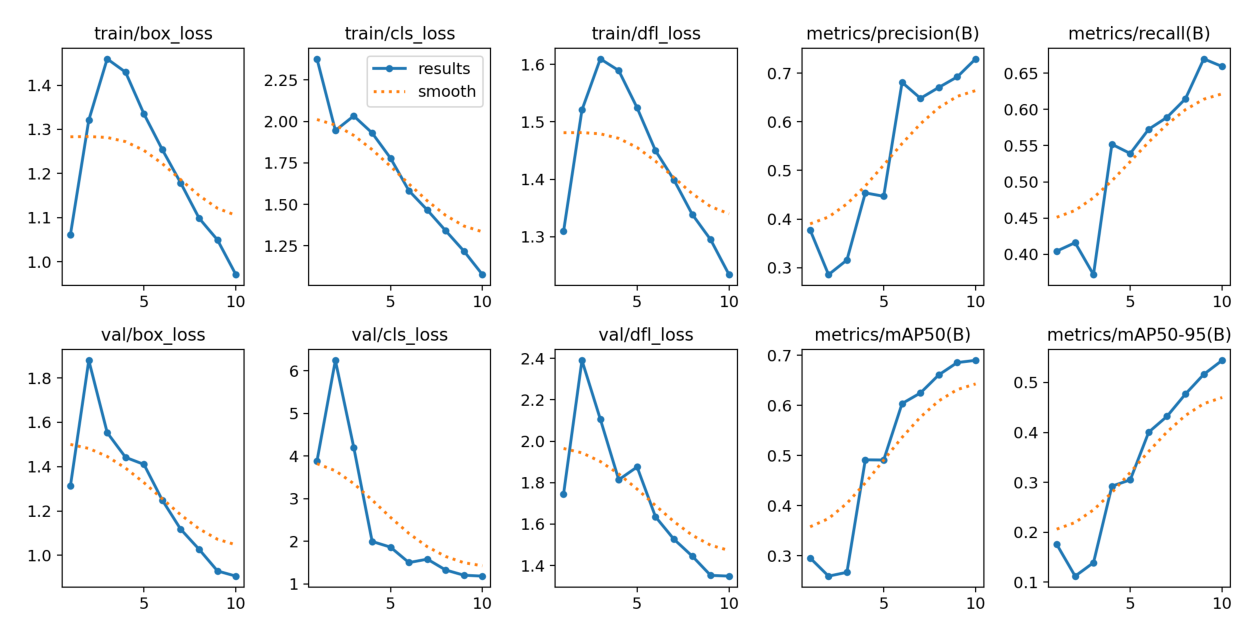

In [50]:
results_graphics = cv2.imread(os.path.join(result_dir, 'results.png'))
view(results_graphics)

In [53]:
dir_result_val = '/content/runs/detect/yolov8s_modelo_eval'
os.path.exists(dir_result_val)

True

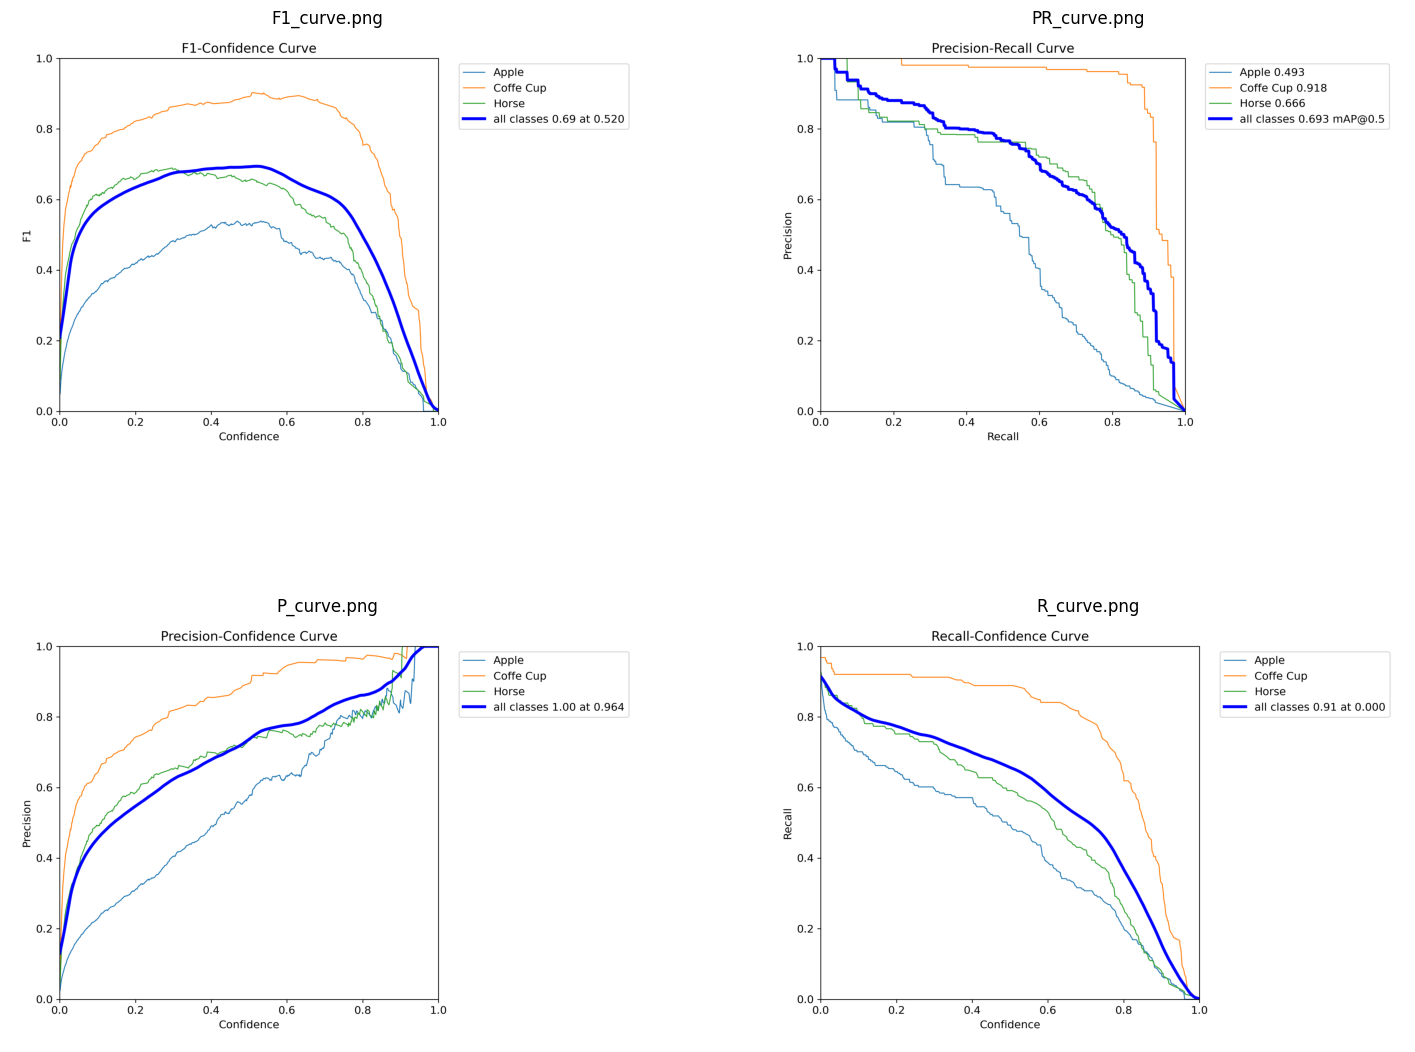

In [55]:
imgs = ['F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']

plt.figure(figsize=(18,14))
for i, img in enumerate(imgs):
  plt.subplot(2,2, i +1)
  plt.title(imgs[i])
  plt.axis('off')

  graph = cv2.imread(os.path.join(dir_result_val, img))
  graph = cv2.cvtColor(graph, cv2.COLOR_BGR2RGB)
  plt.imshow(graph)

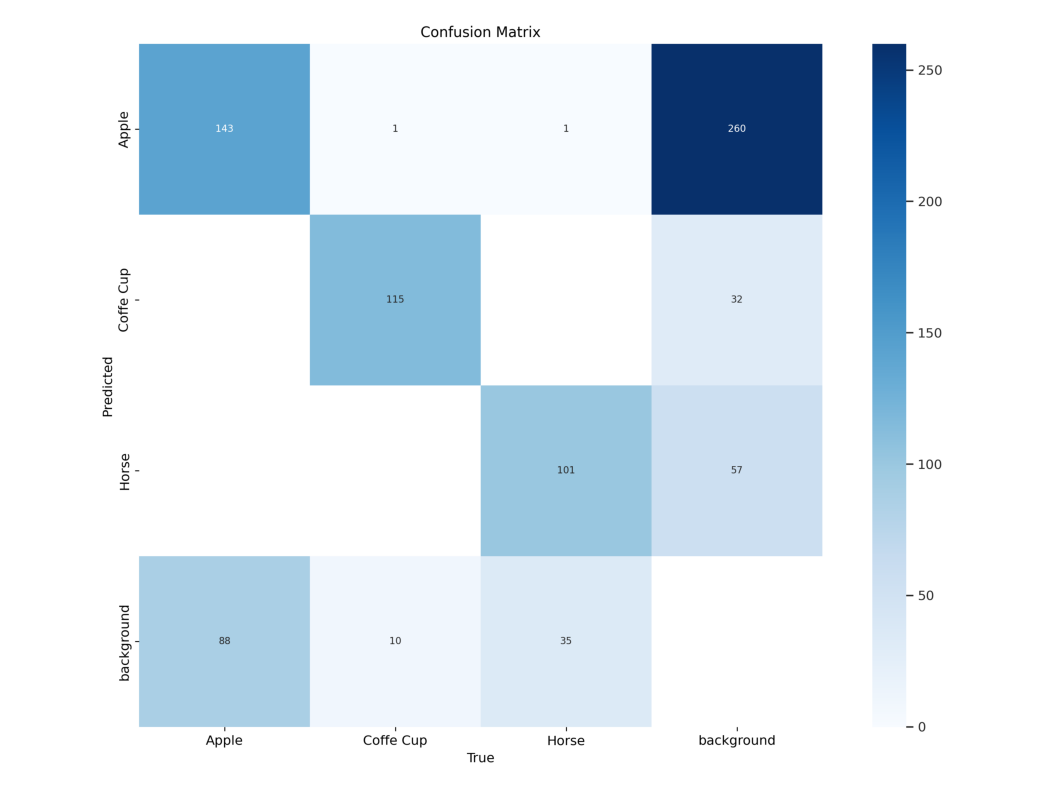

In [56]:
conf_matrix = cv2.imread(os.path.join(dir_result_val, 'confusion_matrix.png'))
view(conf_matrix)

### Testes (manuais) do modelo

In [58]:
IMAGES_TEST = '/content/drive/MyDrive/imagens'

True

#### CLI

In [60]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8s_customizado/weights/best.pt source='/content/drive/MyDrive/imagens/img-canecas.jpg' save=true

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/imagens/img-canecas.jpg: 480x640 6 Coffe Cups, 61.6ms
Speed: 4.4ms preprocess, 61.6ms inference, 144.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


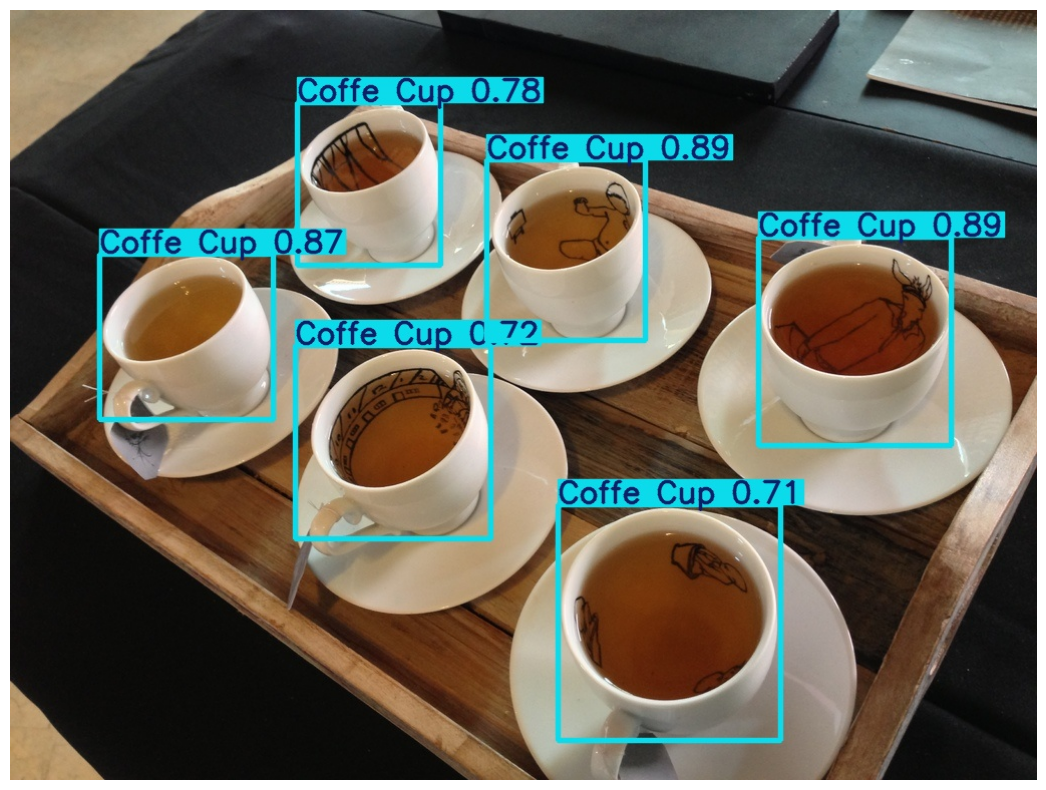

In [66]:
result_test = cv2.imread('/content/runs/detect/predict/img-canecas.jpg')
view(result_test)

In [71]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8s_customizado/weights/best.pt source='/content/drive/MyDrive/imagens/caneca01.jpg' save=true

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/imagens/caneca01.jpg: 384x640 1 Coffe Cup, 65.2ms
Speed: 4.3ms preprocess, 65.2ms inference, 179.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


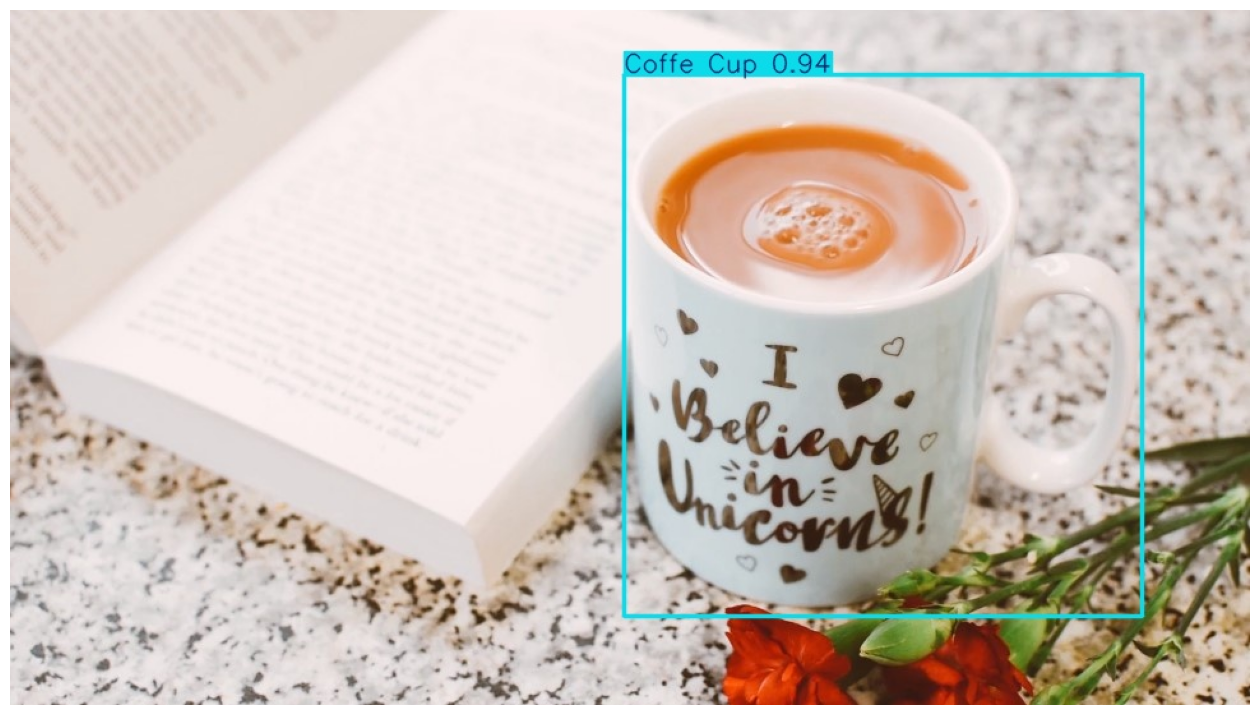

In [72]:
result_test = cv2.imread('/content/runs/detect/predict2/caneca01.jpg')
view(result_test)

#### Python

In [59]:
# Caminho dos pesos do modelo customizado
model_custom = YOLO('/content/runs/detect/yolov8s_customizado/weights/best.pt')

In [67]:
img = cv2.imread('/content/drive/MyDrive/imagens/img-canecas.jpg')
result = model_custom.predict(source=img)


0: 480x640 6 Coffe Cups, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


In [69]:
result[0].boxes.data # A partir daqui, é possível realizar o recorte ou somente a exibição

tensor([[7.4637e+02, 2.2652e+02, 9.3800e+02, 4.3494e+02, 8.8706e-01, 1.0000e+00],
        [4.7530e+02, 1.4997e+02, 6.3392e+02, 3.2925e+02, 8.8600e-01, 1.0000e+00],
        [8.9140e+01, 2.4346e+02, 2.6248e+02, 4.0892e+02, 8.7331e-01, 1.0000e+00],
        [2.8675e+02, 9.2239e+01, 4.2982e+02, 2.5433e+02, 7.8133e-01, 1.0000e+00],
        [2.8489e+02, 3.3428e+02, 4.7901e+02, 5.2709e+02, 7.2399e-01, 1.0000e+00],
        [5.4687e+02, 4.9326e+02, 7.6825e+02, 7.2823e+02, 7.1321e-01, 1.0000e+00]], device='cuda:0')